**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Javier Augusto Rebull Saucedo
*   MATRÍCULA: A01795838

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(DIR)

In [3]:
#pip install colorama

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

In [5]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [6]:
# Imprimir información sobre el DataFrame
df.info()

# Inicialización de contadores
num_numericas = 0
num_cualitativas = 0

# Clasificación de columnas por tipo de dato
for dtype in df.dtypes:
    if dtype in ['int64', 'float64']:
        num_numericas += 1
    elif dtype in ['object', 'category']:
        num_cualitativas += 1

# Imprimir los resultados del conteo usando HTML para los colores
print('\n')
display(HTML("<span style='color: green;'>Columnas Numéricas = {} totales</span>".format(num_numericas)))
display(HTML("<span style='color: orange;'>Columnas Cualitativas = {} totales</span>".format(num_cualitativas)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB




 2. Determina el porcentaje de valores faltantes por columna.

In [7]:
# Calcular el porcentaje de valores faltantes por columna y redondearlo a dos decimales
porcentaje_faltantes = (df.isnull().mean() * 100).round(2)

# Crear una tabla HTML para visualizar los resultados con formato
html_string = "<h3>Porcentaje de valores faltantes por columna:</h3>"
html_string += "<table>"
html_string += "<tr><th>Columna</th><th style='padding-left: 20px;'>Porcentaje Faltante</th></tr>"

for columna, porcentaje in porcentaje_faltantes.items():
    color = 'red' if porcentaje > 0 else 'black'
    html_string += f"<tr><td style='color: #add8e6;'>{columna}</td><td style='color: {color}; padding-left: 20px;'>{porcentaje:.2f}%</td></tr>"

html_string += "</table>"

# Mostrar los resultados formateados
display(HTML(html_string))

Columna,Porcentaje Faltante
person_age,0.00%
person_income,0.00%
person_home_ownership,0.00%
person_emp_length,2.75%
loan_intent,0.00%
loan_grade,0.00%
loan_amnt,0.00%
loan_int_rate,9.56%
loan_status,0.00%
loan_percent_income,0.00%


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

# **Tendencia central (media, mediana)**

In [8]:
# Seleccionar solo columnas numéricas
dfNumericas = df.select_dtypes(include=['number'])

# Obtener la media y la mediana de las columnas numéricas
media = dfNumericas.mean()
mediana = dfNumericas.median()

# Preparar la tabla HTML para mostrar los resultados con formato
html_string = """
<style>
    th, td {padding: 8px; border: 1px solid black; border-collapse: collapse;}
    th {color: #add8e6; text-align: center;}  /* Azul claro */
    td {text-align: right;}
    td:first-child {text-align: left;}  /* Justifica a la izquierda solo la primera columna de celdas */
    .center {text-align: center;}
</style>
<h3 class='center'>Estadísticas de Tendencia Central</h3>
<table>
    <tr><th>Columna</th><th>Media</th><th>Mediana</th></tr>
"""

for columna in dfNumericas.columns:
    html_string += f"<tr><td>{columna}</td><td>{media[columna]:,.2f}</td><td>{mediana[columna]:,.2f}</td></tr>"

html_string += "</table>"

# Mostrar la tabla
display(HTML(html_string))

Columna,Media,Mediana
person_age,27.73,26.00
person_income,"66,074.85","55,000.00"
person_emp_length,4.79,4.00
loan_amnt,"9,589.37","8,000.00"
loan_int_rate,11.01,10.99
loan_status,0.22,0.00
loan_percent_income,0.17,0.15
cb_person_cred_hist_length,5.80,4.00


# **Dispersión o variabilidad (min, max, desviación estándar, cuartiles)**

In [9]:
# Usar describe para obtener las estadísticas de dispersión/variabilidad de las columnas numéricas
estadisticasDispersión = dfNumericas.describe()

# Seleccionar las estadísticas relevantes de dispersión o variabilidad
estadisticasDispersión = estadisticasDispersión.loc[['min', '25%', '50%', '75%', 'max', 'std']]

# Función para aplicar el formato adecuado según el nombre de la columna y el tipo de estadística
def aplicar_formato(valor, columna, stat_type):
    # Específicamente para 'loan_percent_income'
    if 'loan_percent_income' == columna:
        return f"{valor:.2f}%"
    # Específicamente para 'person_age', excepto para la desviación estándar
    elif 'person_age' == columna and stat_type != 'std':
        return f"{int(valor)}"
    elif 'income' in columna or 'loan_amnt' in columna:
        return f"${int(valor):,}"
    elif 'percent' in columna or 'rate' in columna:  # Asegurar que otras columnas de porcentajes se formateen correctamente
        return f"{valor:.2f}%"
    return f"{valor:,.2f}"  # Formato por defecto para otros tipos numéricos

# Transponer el DataFrame para mejorar la visualización
estadisticasDispersión = estadisticasDispersión.T

# Crear una tabla HTML para mostrar los resultados con formato
html_string = """
<style>
    th, td {padding: 8px; text-align: right; border: 1px solid black; border-collapse: collapse;}
    th {color: #add8e6; text-align: center;}  /* Azul claro */
    th:first-child, td:first-child {text-align: left;} /* Justifica a la izquierda solo la primera columna de celdas */
    table {width: auto; margin-left: 0;} /* Ajusta la tabla a la izquierda y ajusta su ancho automáticamente */
</style>
<h3 style='text-align:left;'>Estadísticas de Dispersión o Variabilidad</h3>
<table>
    <tr><th>Columna</th><th>Min</th><th>25%</th><th>50% (Mediana)</th><th>75%</th><th>Max</th><th>Std (Desv. Est.)</th></tr>
"""

# Agregar los datos al HTML
for index, row in estadisticasDispersión.iterrows():
    html_string += f"<tr><td>{index}</td>"
    html_string += "".join([f"<td>{aplicar_formato(value, index, stat_type)}</td>" for value, stat_type in zip(row, estadisticasDispersión.columns)])
    html_string += "</tr>"

html_string += "</table>"

# Mostrar la tabla
display(HTML(html_string))

Columna,Min,25%,50% (Mediana),75%,Max,Std (Desv. Est.)
person_age,20,23,26,30,144,6.35
person_income,"$4,000","$38,500","$55,000","$79,200","$6,000,000","$61,983"
person_emp_length,0.00,2.00,4.00,7.00,123.00,4.14
loan_amnt,$500,"$5,000","$8,000","$12,200","$35,000","$6,322"
loan_int_rate,5.42%,7.90%,10.99%,13.47%,23.22%,3.24%
loan_status,0.00,0.00,0.00,0.00,1.00,0.41
loan_percent_income,0.00%,0.09%,0.15%,0.23%,0.83%,0.11%
cb_person_cred_hist_length,2.00,3.00,4.00,8.00,30.00,4.06


# **Forma (asimetría y curtosis)**

In [10]:
# Calcular asimetría y curtosis para cada columna numérica
asimetria = dfNumericas.skew()
curtosis = dfNumericas.kurt()

# Crear una tabla HTML para mostrar los resultados
html_string = """
<style>
    th, td {padding: 8px; text-align: right; border: 1px solid black; border-collapse: collapse;}
    th {color: #add8e6; text-align: center;}  /* Azul claro */
    td:first-child {text-align: left;} /* Justifica a la izquierda solo la primera columna de celdas */
    table {width: auto; margin-left: 0;} /* Ajusta la tabla a la izquierda y ajusta su ancho automáticamente */
</style>
<h3 style='text-align:left;'>Estadísticas de Forma</h3>
<table>
    <tr><th>Columna</th><th>Asimetría</th><th>Curtosis</th></tr>
"""

# Agregar los datos de asimetría y curtosis al HTML
for columna in dfNumericas.columns:
    html_string += f"<tr><td>{columna}</td><td>{asimetria[columna]:.2f}</td><td>{curtosis[columna]:.2f}</td></tr>"

html_string += "</table>"

# Mostrar la tabla
display(HTML(html_string))

Columna,Asimetría,Curtosis
person_age,2.58,18.56
person_income,32.87,2693.27
person_emp_length,2.61,43.72
loan_amnt,1.19,1.42
loan_int_rate,0.21,-0.67
loan_status,1.36,-0.14
loan_percent_income,1.06,1.22
cb_person_cred_hist_length,1.66,3.72


# **Clasifica las variables person_age y loan_in_rate según los valores observados de asimetría y curtosis**

In [11]:
# Calcular asimetría y curtosis para cada columna numérica
asimetria = dfNumericas.skew()
curtosis = dfNumericas.kurt()

# Clasificación basada en asimetría y curtosis
def clasificar_asimetria_curtosis(asimetria, curtosis):
    clasificacion_asimetria = "simétrica" if abs(asimetria) < 0.5 else ("sesgada a la derecha" if asimetria > 0 else "sesgada a la izquierda")
    clasificacion_curtosis = "normal" if abs(curtosis) < 1 else ("leptocúrtica" if curtosis > 0 else "platicúrtica")
    return clasificacion_asimetria, clasificacion_curtosis

clasificacion_age = clasificar_asimetria_curtosis(asimetria['person_age'], curtosis['person_age'])
clasificacion_rate = clasificar_asimetria_curtosis(asimetria['loan_int_rate'], curtosis['loan_int_rate'])

# Imprimir los resultados de clasificación
print("Clasificación de 'person_age': Asimetría -", clasificacion_age[0], ", Curtosis -", clasificacion_age[1])
print("Clasificación de 'loan_int_rate': Asimetría -", clasificacion_rate[0], ", Curtosis -", clasificacion_rate[1])

Clasificación de 'person_age': Asimetría - sesgada a la derecha , Curtosis - leptocúrtica
Clasificación de 'loan_int_rate': Asimetría - simétrica , Curtosis - normal


4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

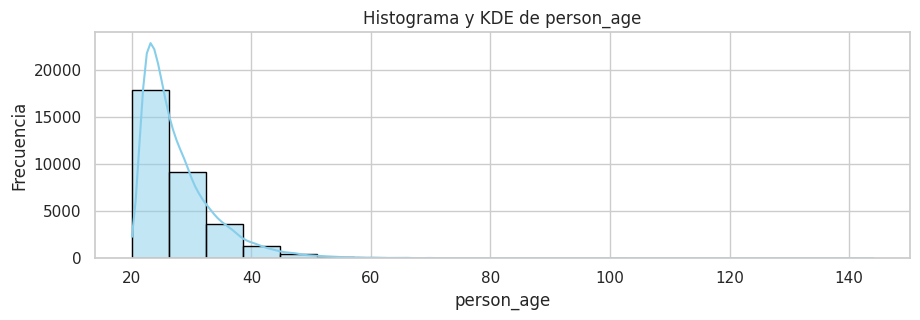

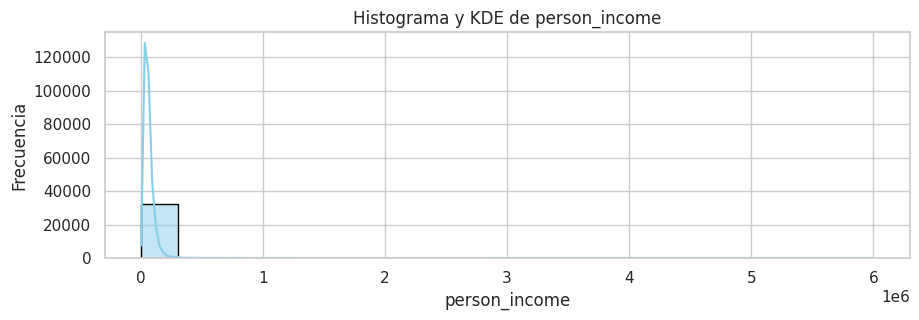

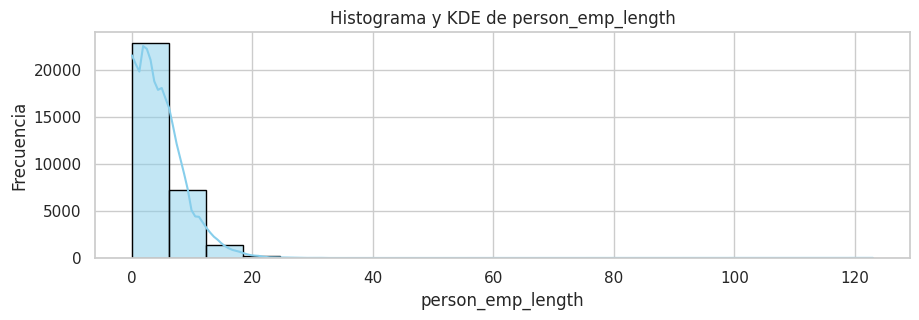

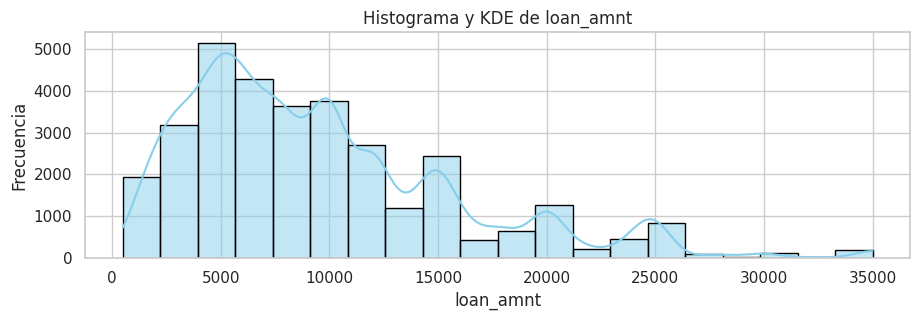

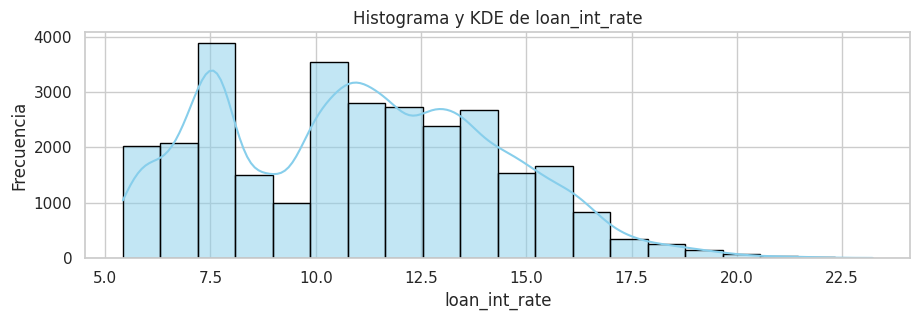

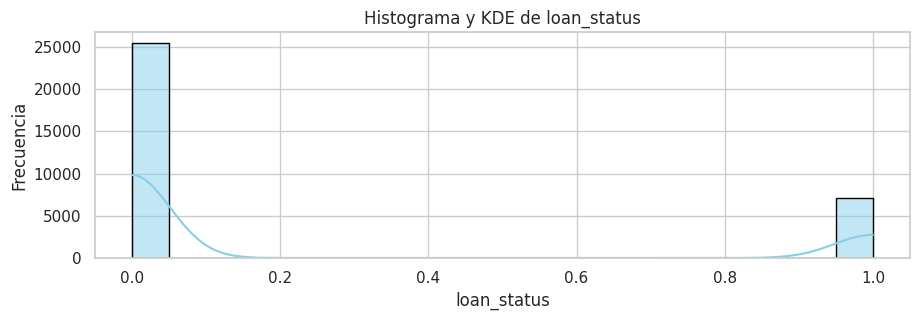

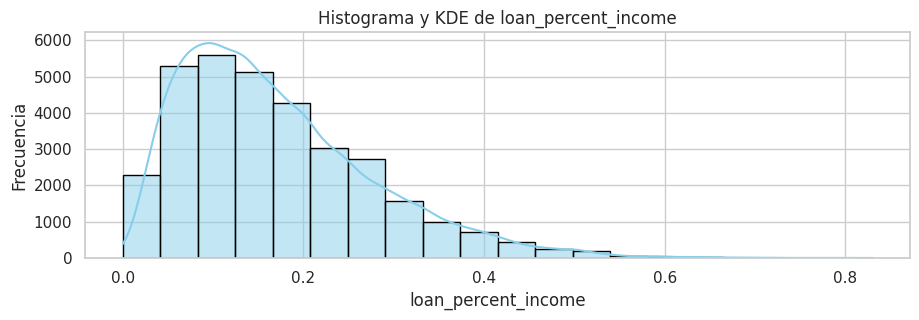

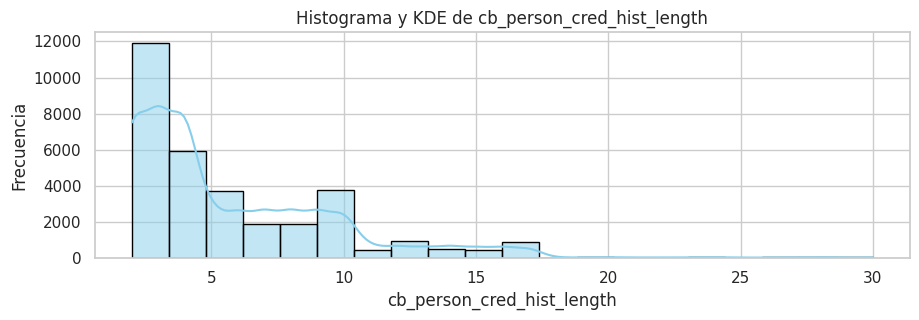

In [12]:
# Configuración para mejorar la visualización
plt.rcParams.update({'figure.max_open_warning': 0})
sns.set(style="whitegrid")  # Estilo de gráfico

# Crear histogramas y gráficos KDE para cada columna numérica
for columna in dfNumericas.columns:
    plt.figure(figsize=(10, 4))

    # Histograma con gráfico KDE
    sns.histplot(dfNumericas[columna], kde=True, color="skyblue", edgecolor='black', binwidth=(dfNumericas[columna].max() - dfNumericas[columna].min()) / 20)

    plt.title(f'Histograma y KDE de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)

    # Ajustar el layout y añadir espacio adicional al fondo del gráfico
    plt.tight_layout(pad=3.0)  # Ajusta el layout y añade espacio

    plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

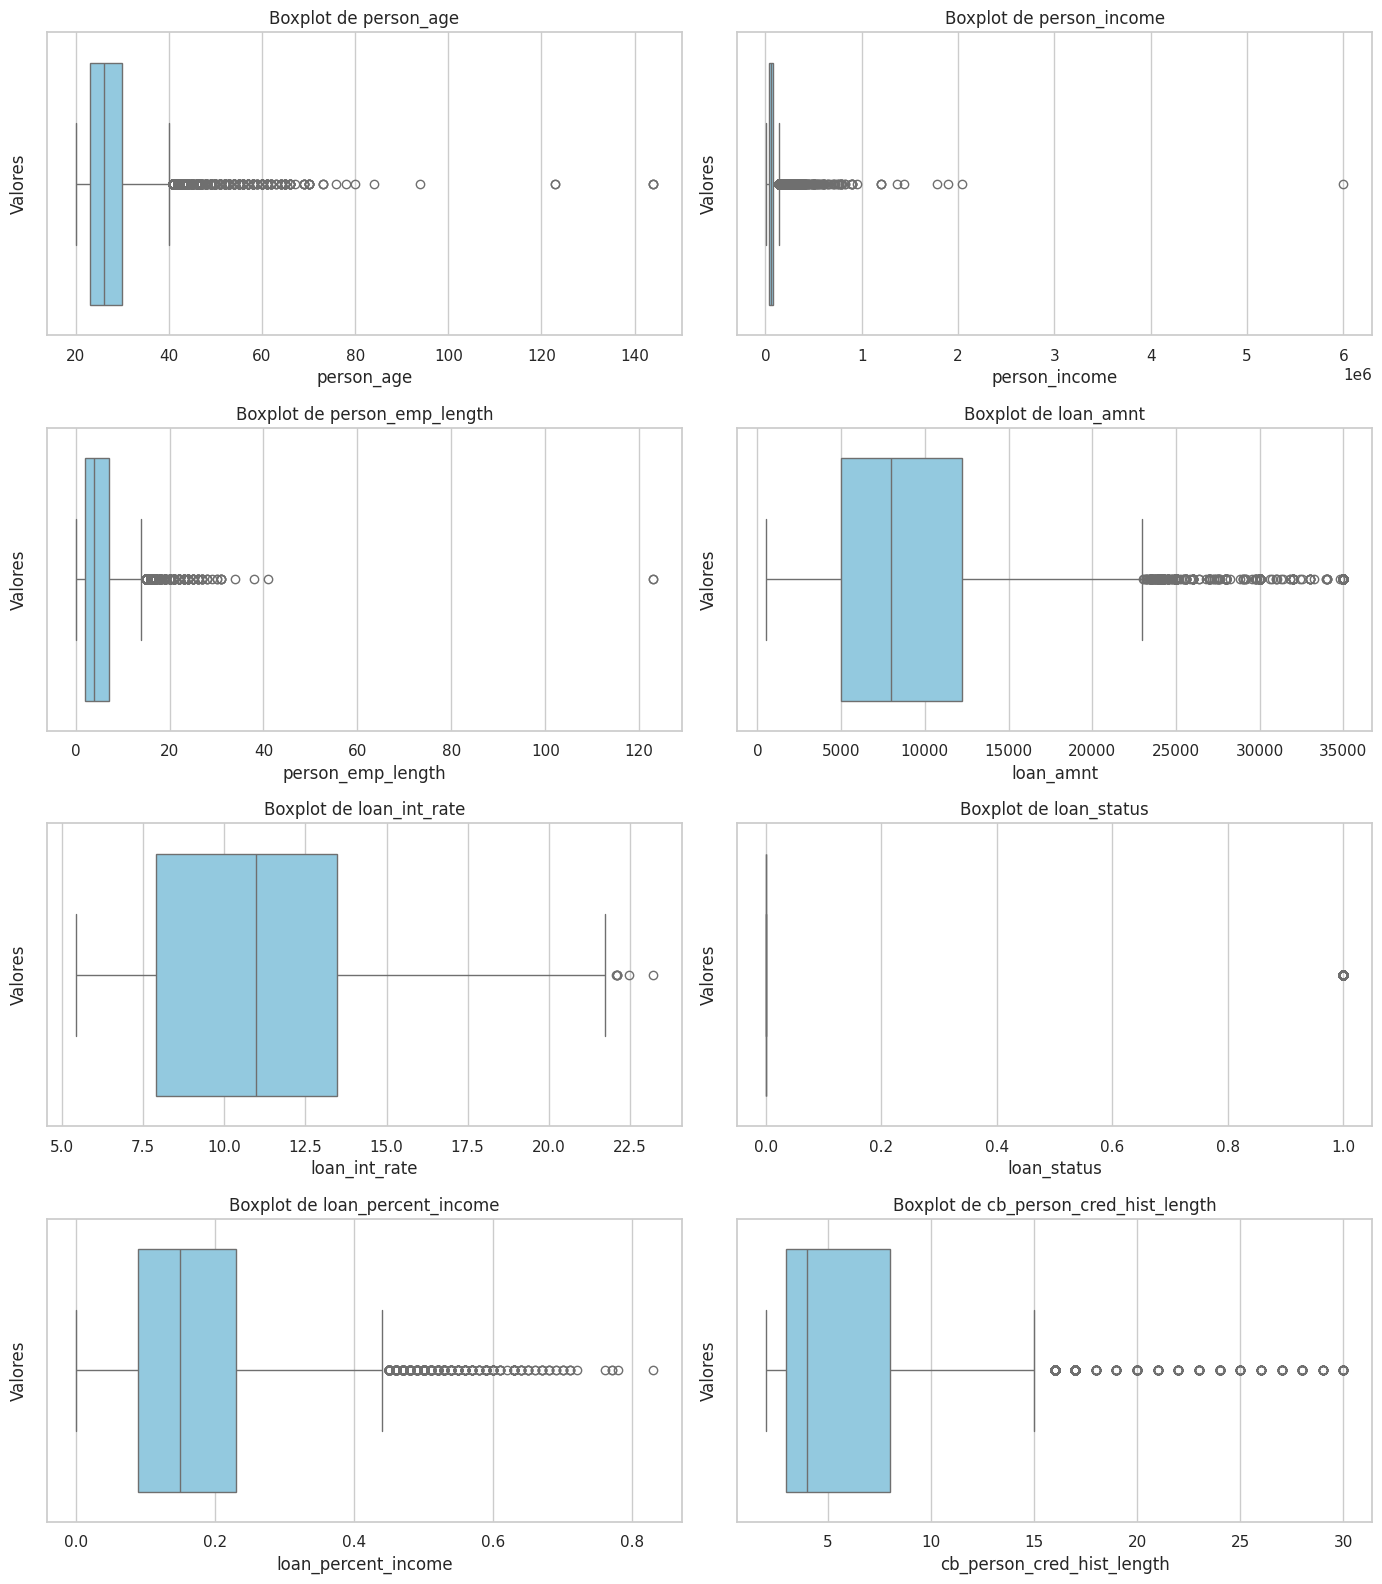

In [13]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y un conjunto de subtramas
fig, axes = plt.subplots(nrows=int(len(dfNumericas.columns) / 2) + len(dfNumericas.columns) % 2, ncols=2, figsize=(14, len(dfNumericas.columns) * 2))
axes = axes.flatten()  # Convertir la matriz de ejes en una lista para facilitar el acceso

# Generar un boxplot para cada columna numérica
for i, columna in enumerate(dfNumericas.columns):
    sns.boxplot(x=dfNumericas[columna], ax=axes[i], color="skyblue")
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Valores')

# Ajustar el layout para evitar la superposición y mejorar la visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()


*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [14]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [15]:
# Mostrar estadísticas descriptivas para variables de texto en formato bonito
estadisticasTexto = df.describe(include='object')
html = "<h3>Estadísticas de Tendencia Central y Cardinalidad para Variables de Texto:</h3>"
html += estadisticasTexto.to_html(classes='table table-striped', formatters={'freq': '{:,.0f}'.format})

# Agregar recuentos únicos para cada variable de texto en formato bonito
html += "<h3>Recuentos Únicos para Cada Variable de Texto:</h3>"
variablesTexto = df.select_dtypes(include='object').columns
for columna in variablesTexto:
    recuentos = df[columna].value_counts().to_frame().reset_index()
    recuentos.columns = ['Valor', 'Recuentos']
    html += f"<h4>{columna}:</h4>"
    html += recuentos.to_html(classes='table table-striped', index=False, formatters={'Recuentos': '{:,.0f}'.format})

# Mostrar la tabla HTML
display(HTML(html))

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

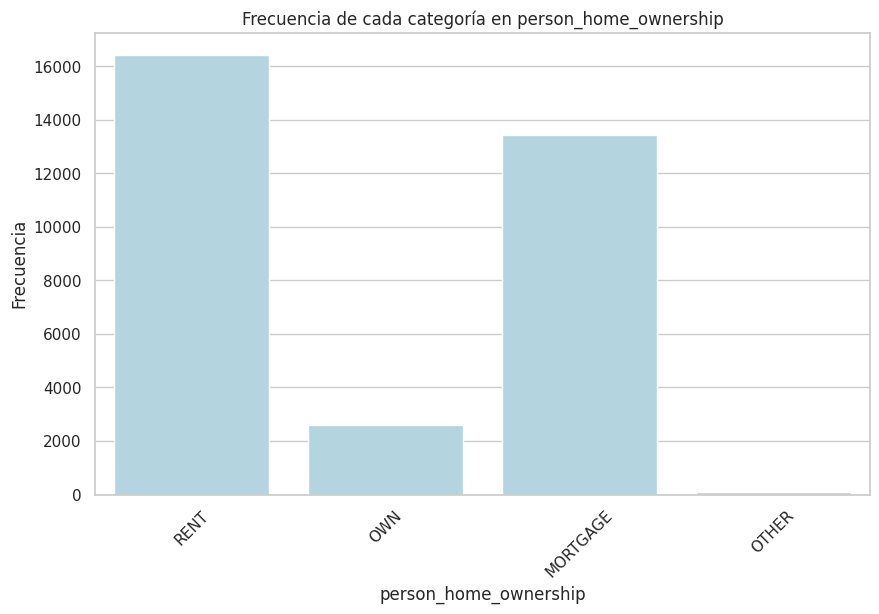

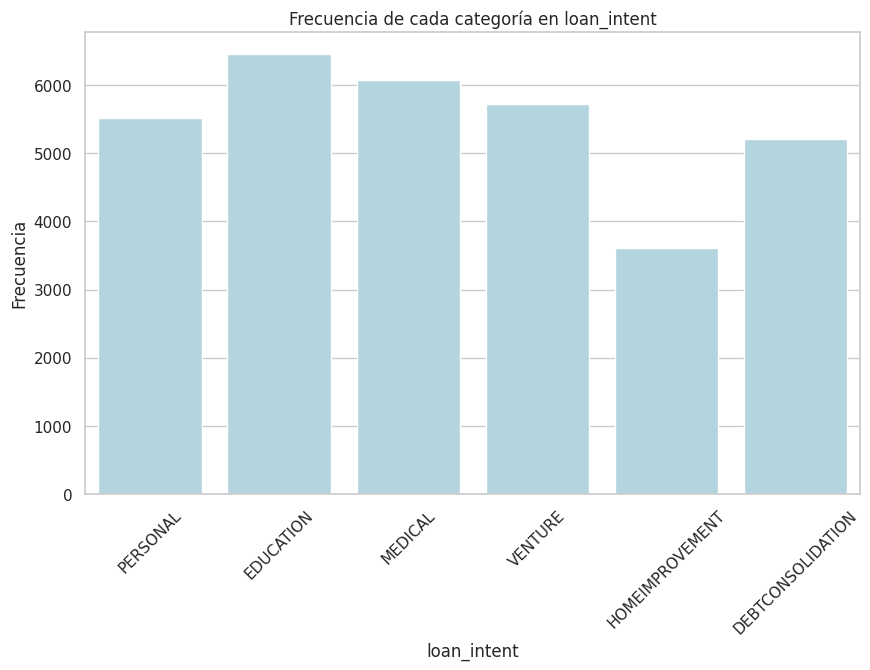

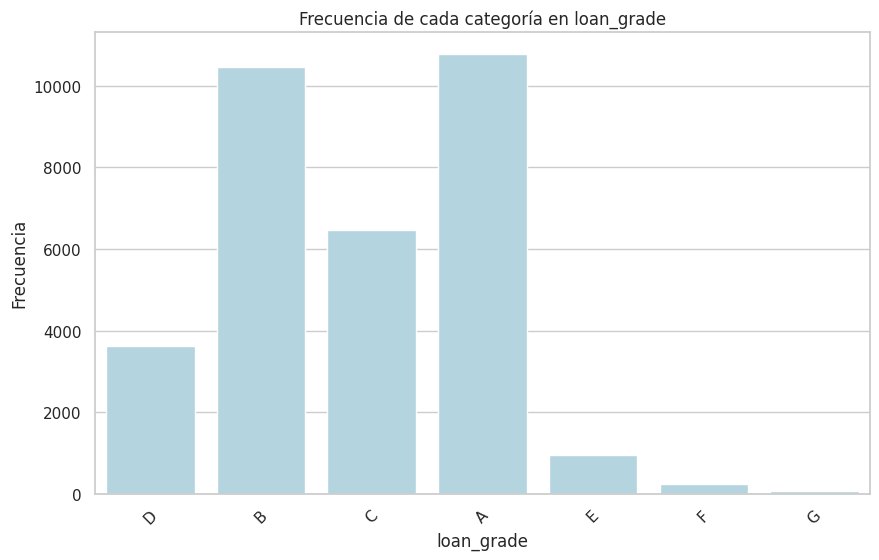

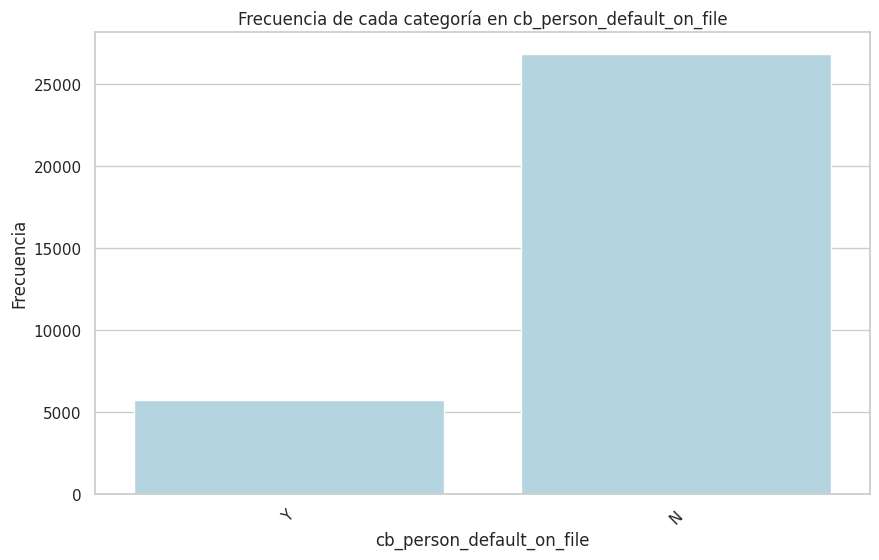

In [16]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Lista de variables de texto
variablesTexto = df.select_dtypes(include='object').columns

# Crear gráficos de barras para cada variable de texto
for columna in variablesTexto:
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    sns.countplot(x=columna, data=df, color='lightblue')  # Usando 'color' en lugar de 'palette'
    plt.title(f'Frecuencia de cada categoría en {columna}')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

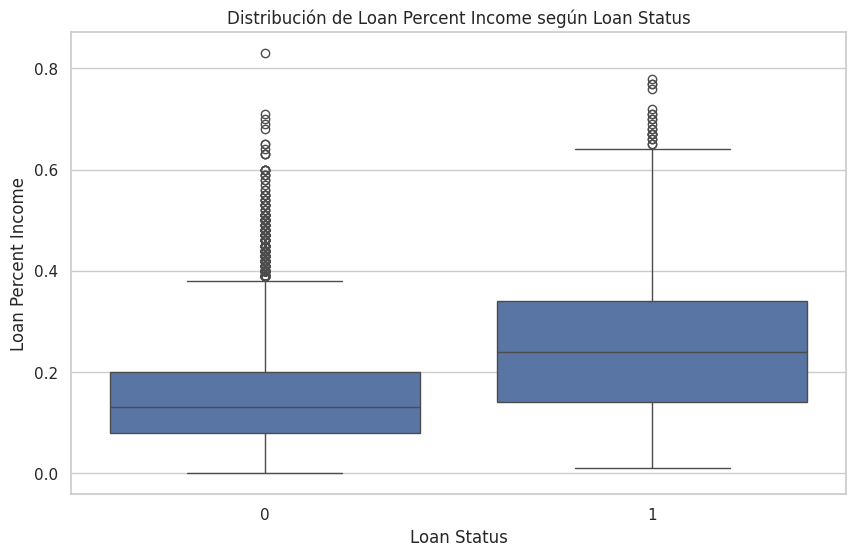

In [17]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)

# Añadir títulos y etiquetas
plt.title('Distribución de Loan Percent Income según Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Percent Income')

# Mostrar el gráfico
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

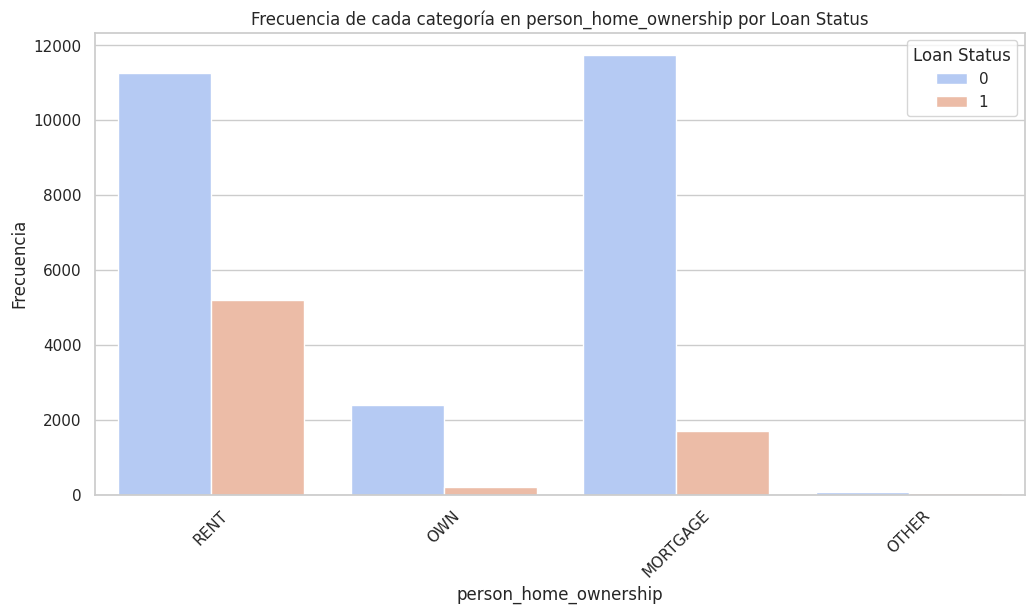

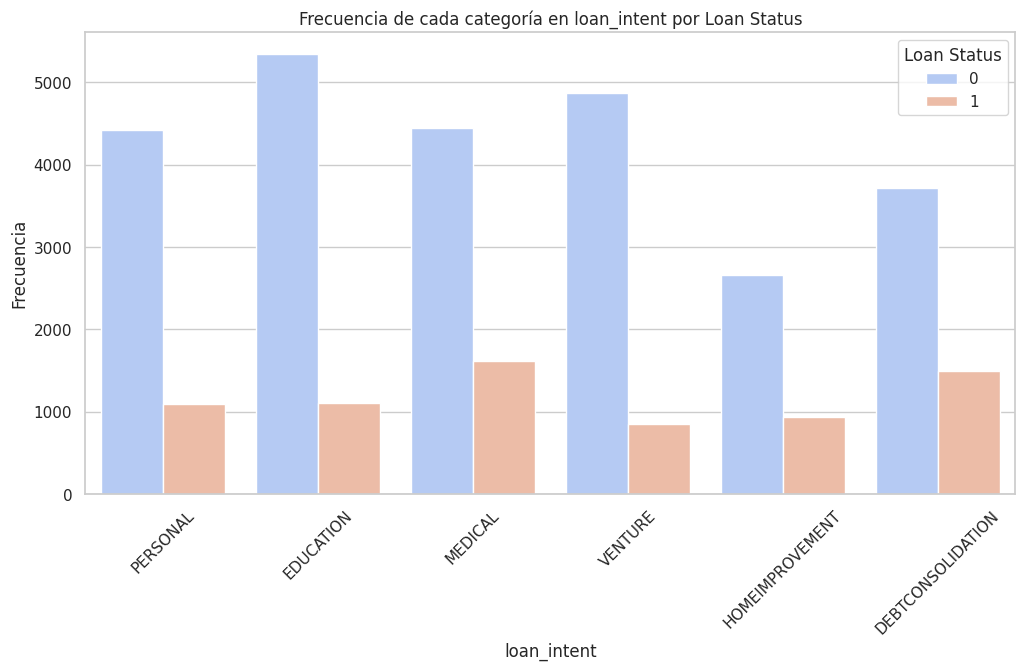

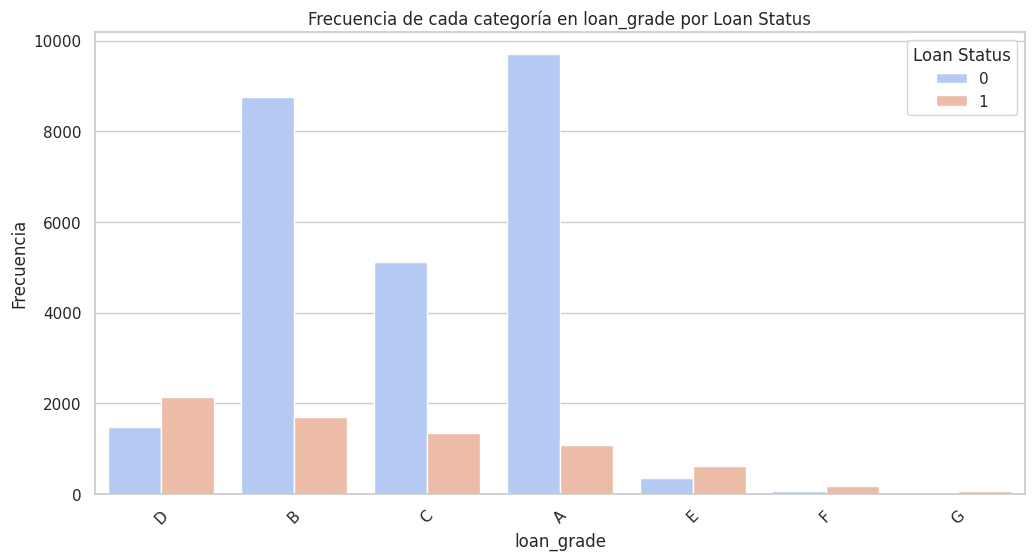

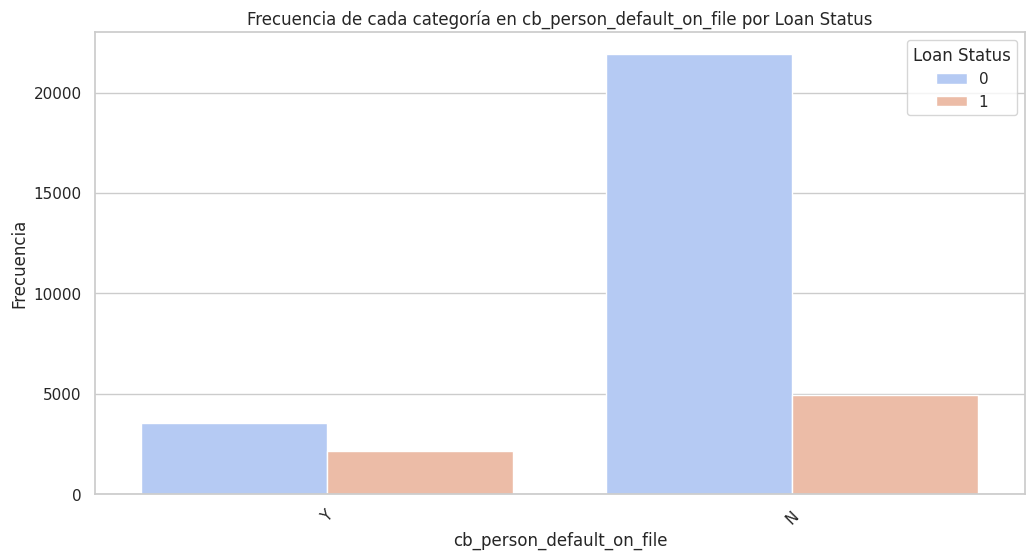

In [18]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Lista de variables de texto
variablesTexto = df.select_dtypes(include='object').columns

# Crear gráficos de barras para cada variable de texto, separando según loan_status
for columna in variablesTexto:
    plt.figure(figsize=(12, 6))  # Tamaño de la figura
    sns.countplot(x=columna, hue='loan_status', data=df, palette='coolwarm')
    plt.title(f'Frecuencia de cada categoría en {columna} por Loan Status')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.legend(title='Loan Status')
    plt.show()


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

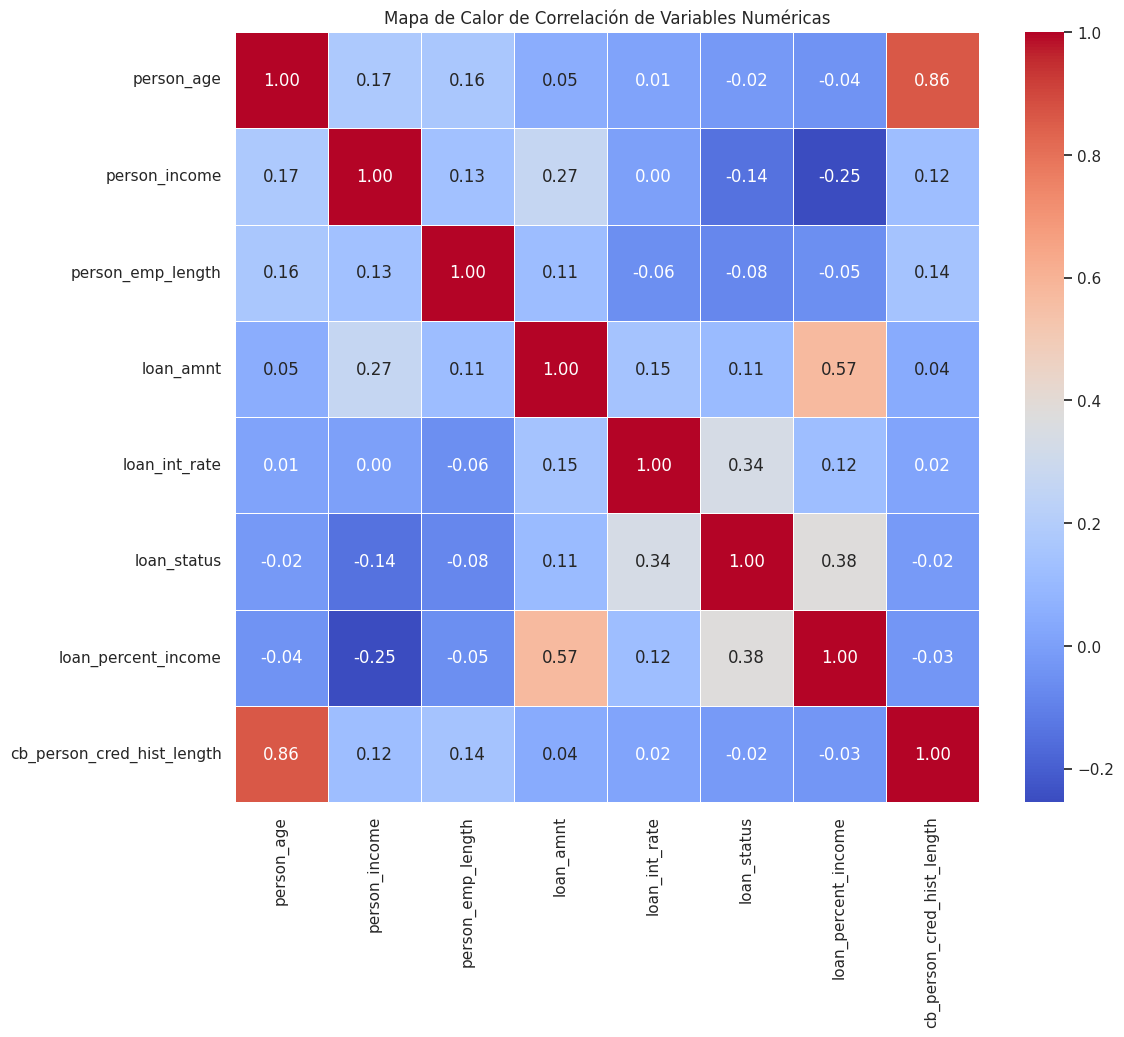

Variable con mayor correlación con 'loan_status': loan_percent_income (Correlación: 0.38)


In [19]:
# Seleccionar solo las columnas numéricas para calcular la correlación
dfNumericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación para las columnas numéricas
correlacion = dfNumericas.corr()

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

# Encontrar la variable con mayor correlación con 'loan_status', excluyendo la correlación consigo mismo
correlacion_abs = correlacion['loan_status'].drop('loan_status').abs()
variable_mayor_correlacion = correlacion_abs.idxmax()
max_correlation_value = correlacion_abs.max()

print(f"Variable con mayor correlación con 'loan_status': {variable_mayor_correlacion} (Correlación: {max_correlation_value:.2f})")
